# Plots position for all stocks


`Must restart the notebook and run all each time`

In [1]:
FROM = 251
TO = 501

In [2]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
from main import getMyPosition as getPosition

nInst = 0
nt = 0
commRate = 0.0010
dlrPosLimit = 10000

position = []

def loadPrices(fn):
    global nt, nInst
    #df=pd.read_csv(fn, sep='\s+', names=cols, header=None, index_col=0)
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    nt, nInst = df.values.shape
    return (df.values).T

pricesFile="./data/prices.txt"
prcAll = loadPrices(pricesFile)
print ("Loaded %d instruments for %d days" % (nInst, nt))

currentPos = np.zeros(nInst)

def calcPL(prcHist):
    cash = 0
    curPos = np.zeros(nInst)
    totDVolume = 0
    totDVolumeSignal = 0
    totDVolumeRandom = 0
    value = 0
    todayPLL = []
    (_,nt) = prcHist.shape
    for t in range(FROM, TO): 
        prcHistSoFar = prcHist[:,:t]
        newPosOrig = getPosition(prcHistSoFar)
        curPrices = prcHistSoFar[:,-1] #prcHist[:,t-1]
        posLimits = np.array([int(x) for x in dlrPosLimit / curPrices])
        clipPos = np.clip(newPosOrig, -posLimits, posLimits)
        newPos = np.array([np.trunc(x) for x in clipPos])
        deltaPos = newPos - curPos
        dvolumes = curPrices * np.abs(deltaPos)
        dvolume = np.sum(dvolumes)
        totDVolume += dvolume
        comm = dvolume * commRate
        cash -= curPrices.dot(deltaPos) + comm
        curPos = np.array(newPos)
        posValue = curPos.dot(curPrices)
        todayPL = cash + posValue - value
        todayPLL.append(todayPL)
        value = cash + posValue
        ret = 0.0

        position.append(newPos)

        if (totDVolume > 0):
            ret = value / totDVolume
        print ("Day %d value: %.2lf todayPL: $%.2lf $-traded: %.0lf return: %.5lf" % (t,value, todayPL, totDVolume, ret))
    pll = np.array(todayPLL)
    (plmu,plstd) = (np.mean(pll), np.std(pll))
    annSharpe = 0.0
    if (plstd > 0):
        annSharpe = np.sqrt(250) * plmu / plstd
    return (plmu, ret, plstd, annSharpe, totDVolume)



(meanpl, ret, plstd, sharpe, dvol) = calcPL(prcAll)
score = meanpl - 0.1*plstd
print ("=====")
print ("mean(PL): %.1lf" % meanpl)
print ("return: %.5lf" % ret)
print ("StdDev(PL): %.2lf" % plstd)
print ("annSharpe(PL): %.2lf " % sharpe)
print ("totDvolume: %.0lf " % dvol)
print ("Score: %.2lf" % score)

Loaded 50 instruments for 750 days
Day 251 value: -11.19 todayPL: $-11.19 $-traded: 11190 return: -0.00100
Day 252 value: -1.49 todayPL: $9.70 $-traded: 23400 return: -0.00006
Day 253 value: -11.75 todayPL: $-10.25 $-traded: 35685 return: -0.00033
Day 254 value: -38.06 todayPL: $-26.32 $-traded: 44821 return: -0.00085
Day 255 value: -107.98 todayPL: $-69.92 $-traded: 57575 return: -0.00188
Day 256 value: -115.82 todayPL: $-7.83 $-traded: 64728 return: -0.00179
Day 257 value: -63.49 todayPL: $52.33 $-traded: 73332 return: -0.00087
Day 258 value: -90.01 todayPL: $-26.52 $-traded: 81954 return: -0.00110
Day 259 value: -110.84 todayPL: $-20.83 $-traded: 93110 return: -0.00119
Day 260 value: -96.07 todayPL: $14.77 $-traded: 98972 return: -0.00097
Day 261 value: -206.61 todayPL: $-110.54 $-traded: 104898 return: -0.00197
Day 262 value: -213.40 todayPL: $-6.80 $-traded: 110773 return: -0.00193
Day 263 value: -262.18 todayPL: $-48.78 $-traded: 116805 return: -0.00224
Day 264 value: -305.12 tod

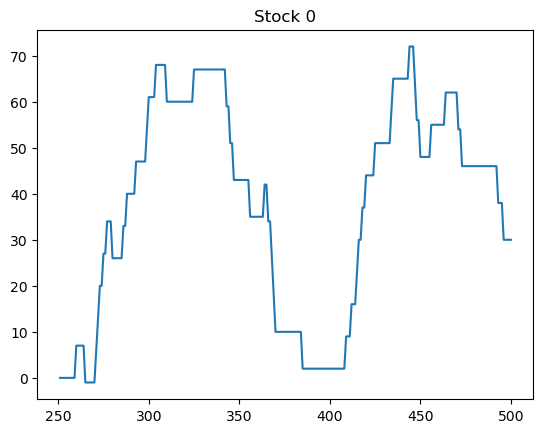

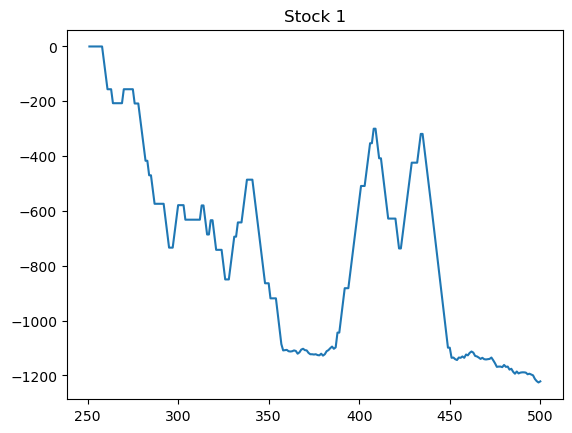

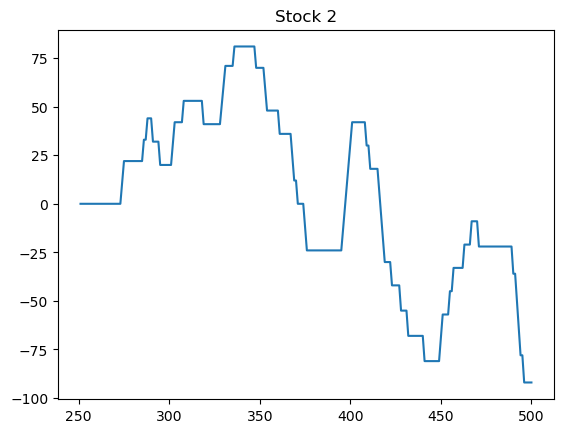

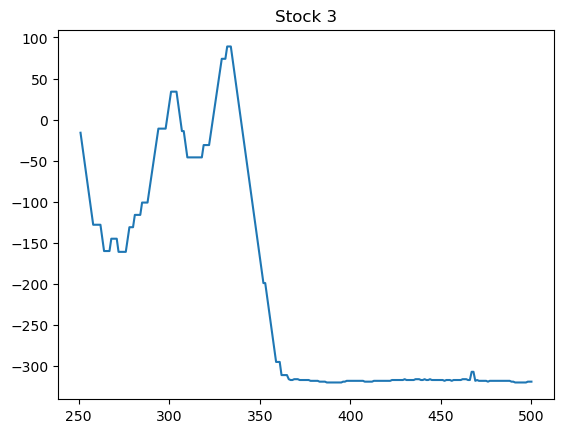

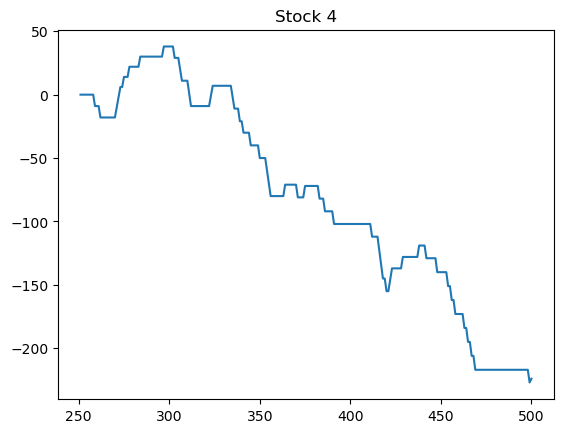

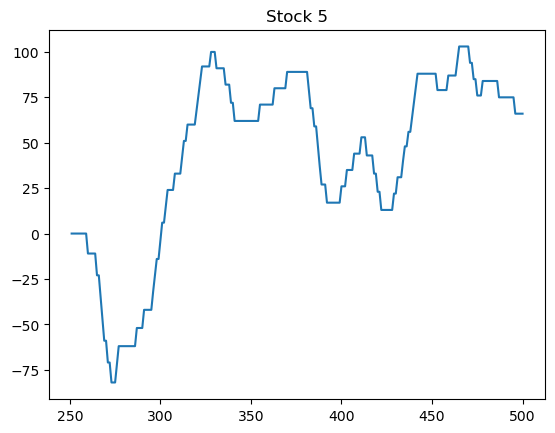

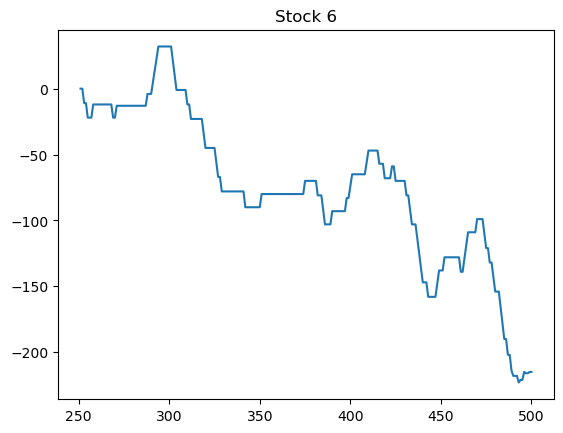

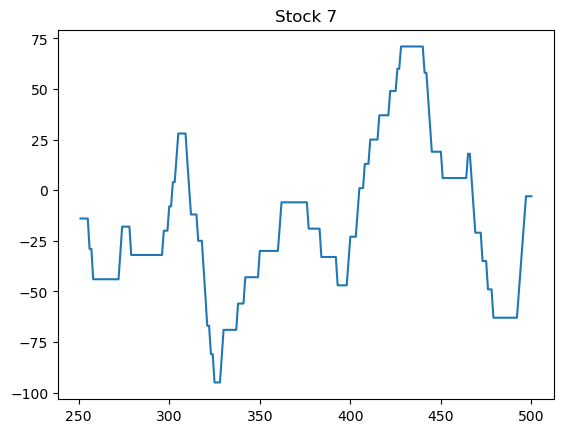

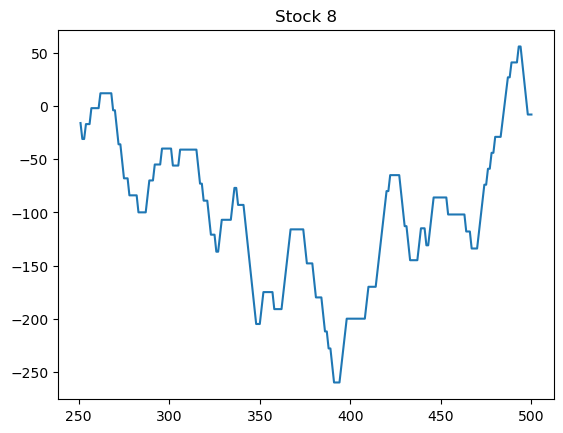

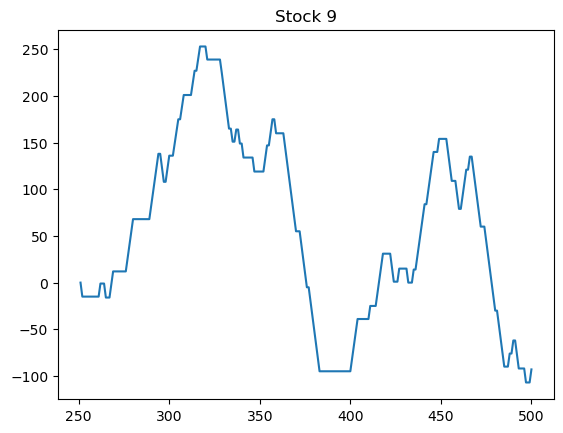

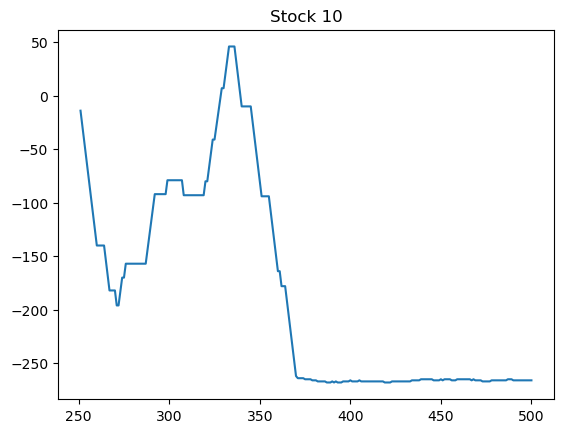

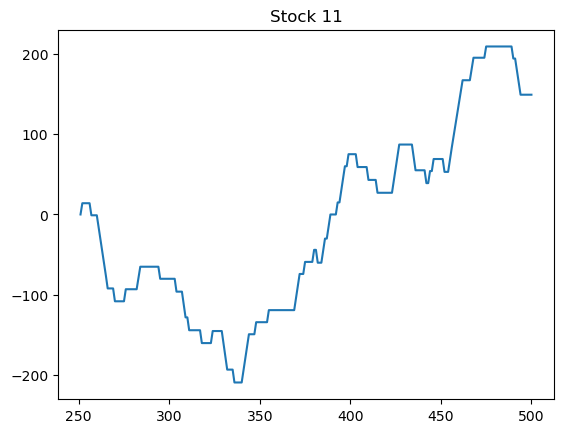

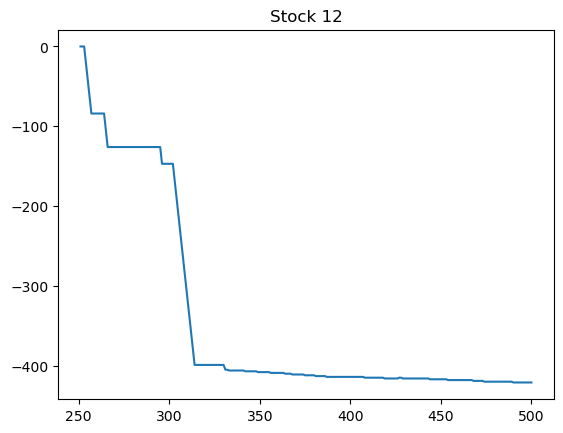

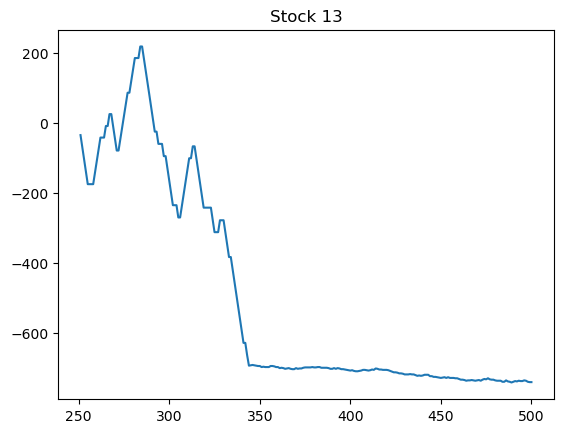

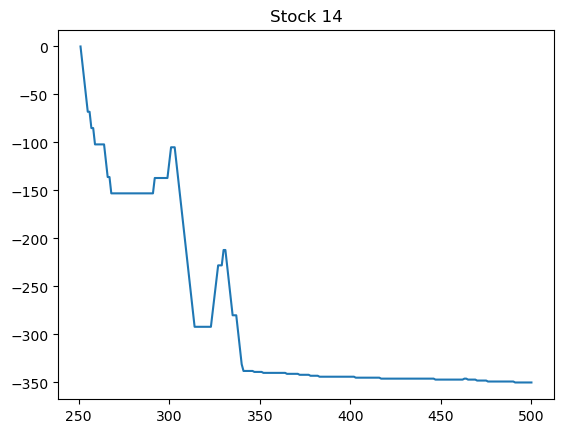

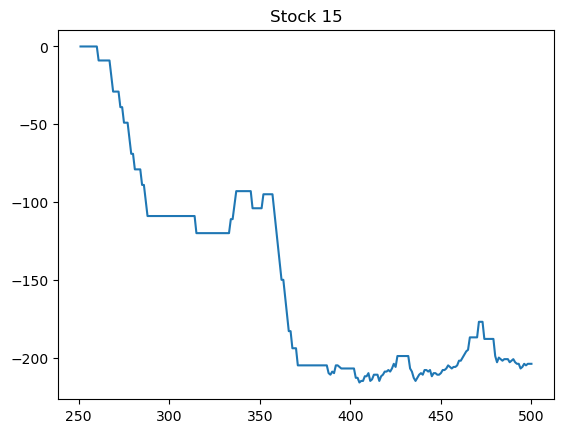

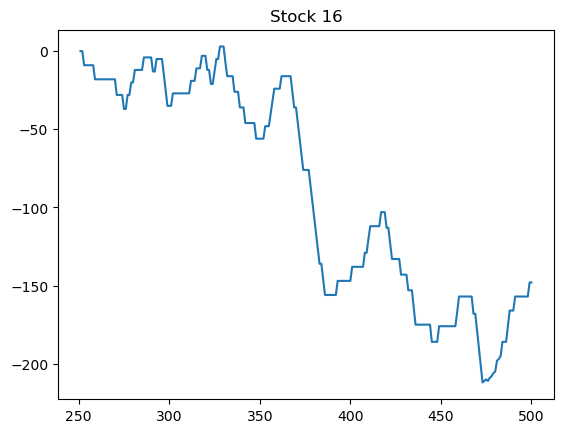

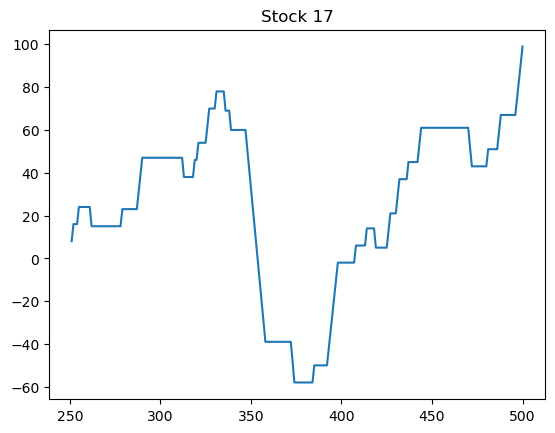

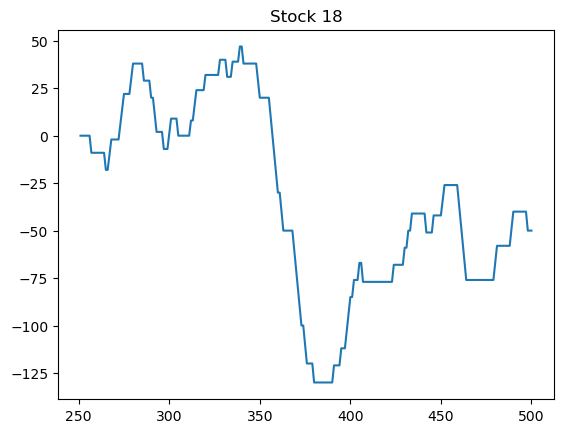

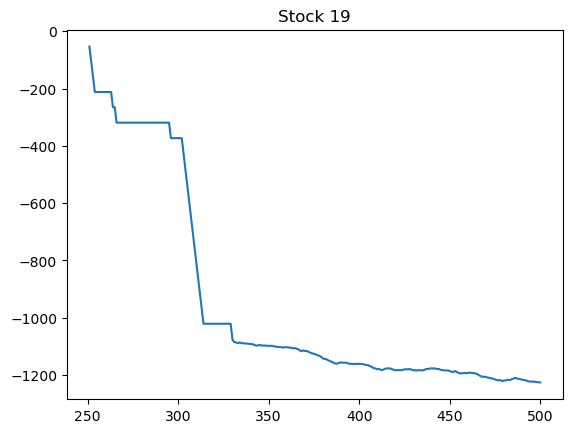

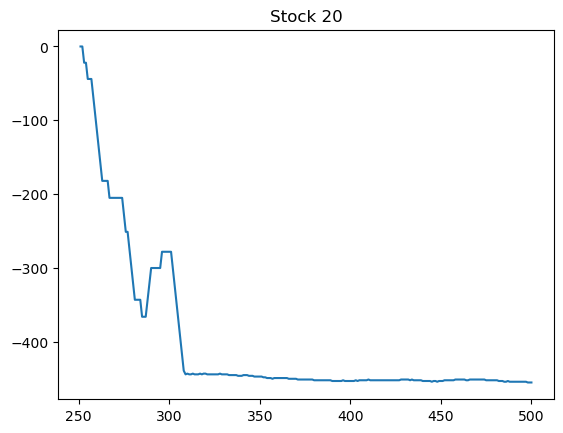

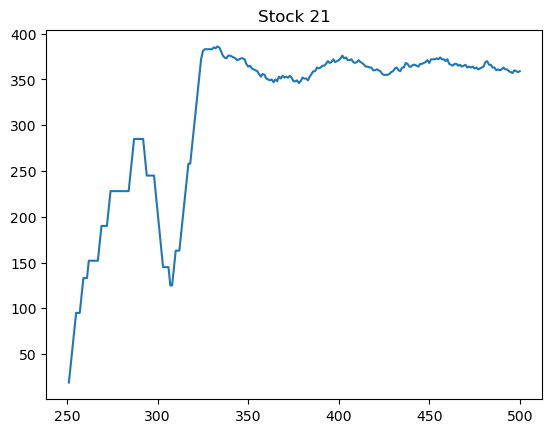

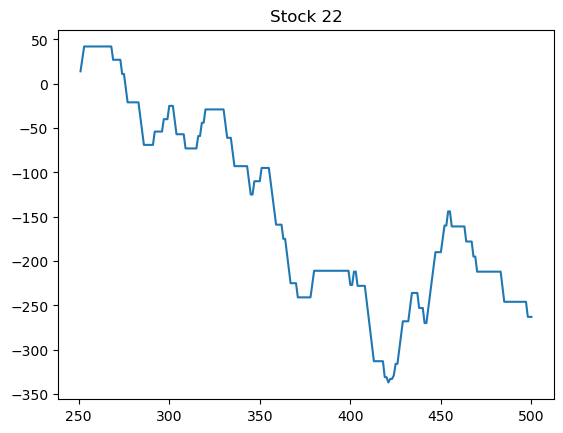

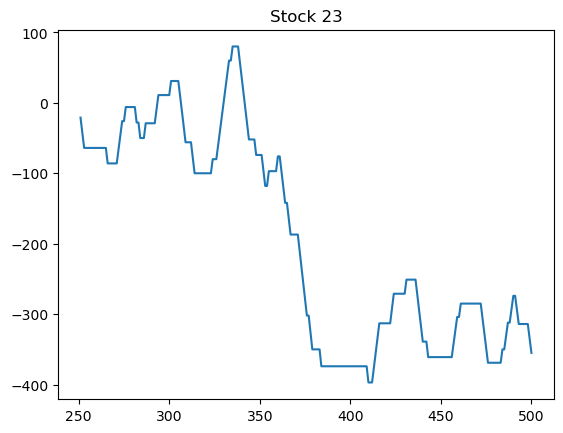

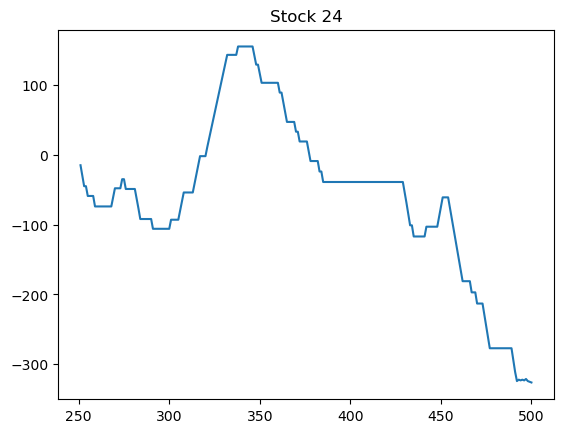

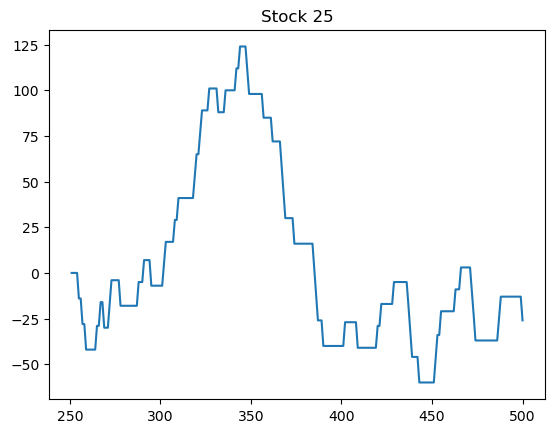

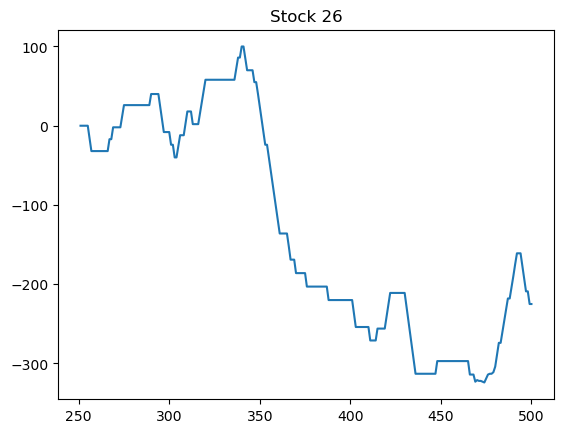

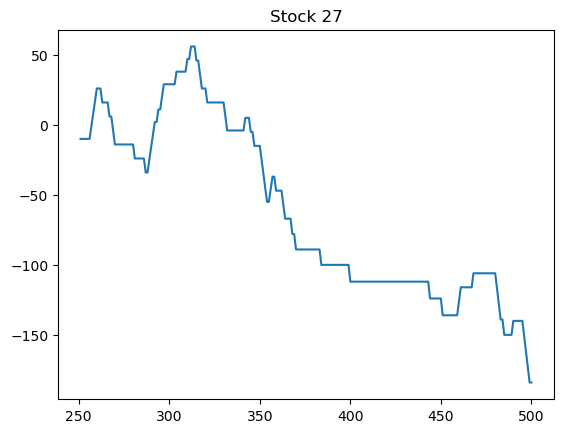

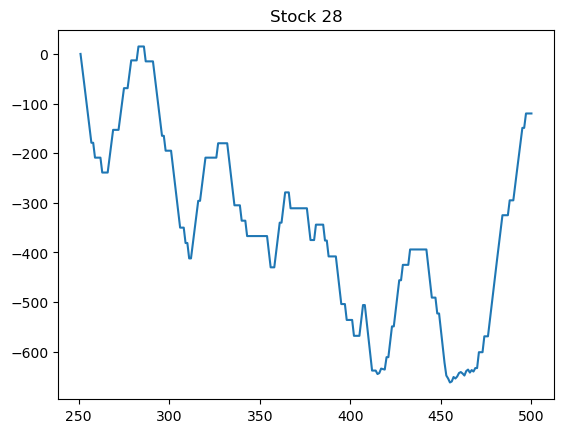

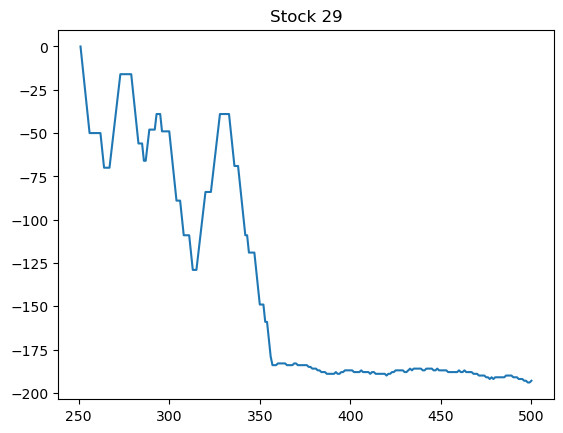

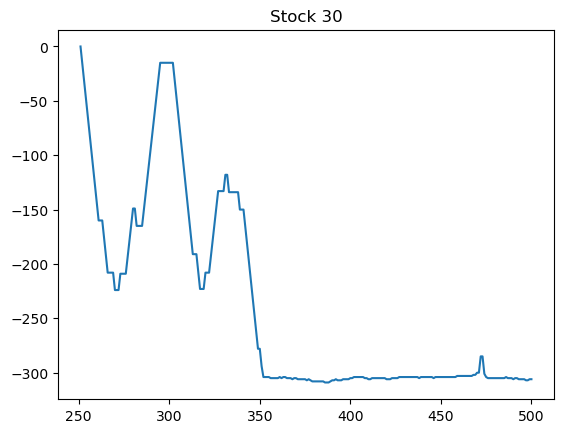

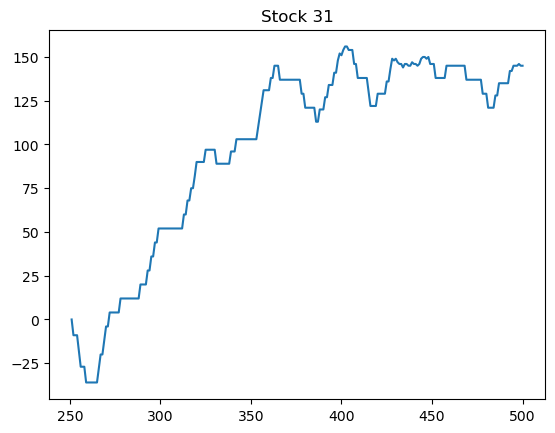

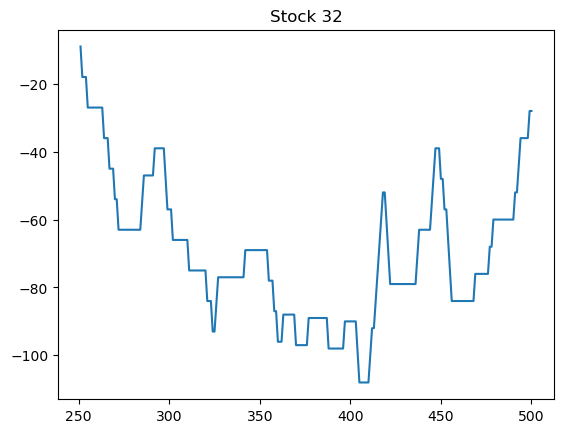

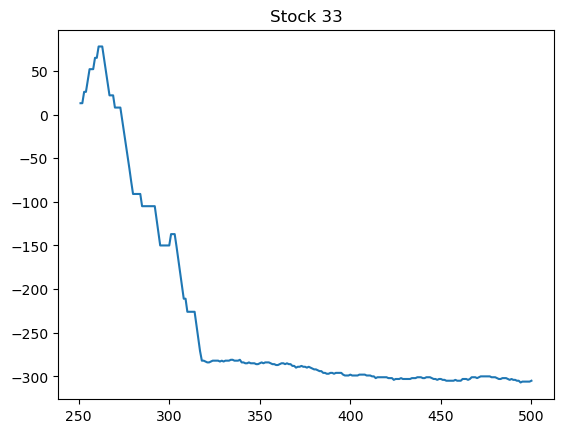

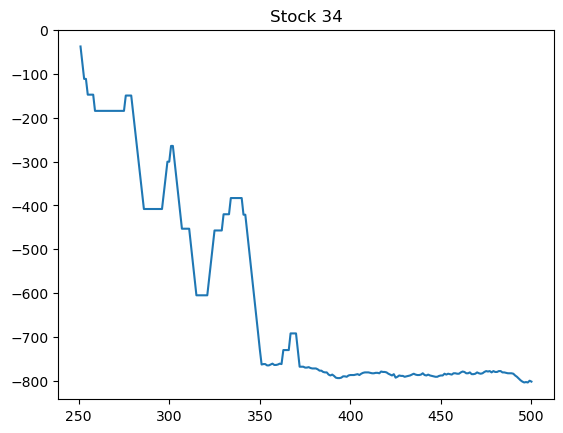

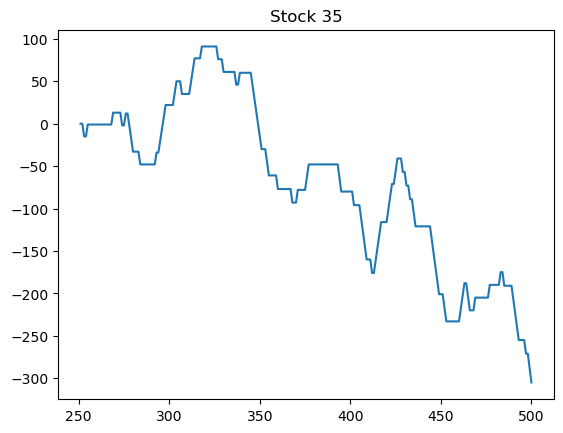

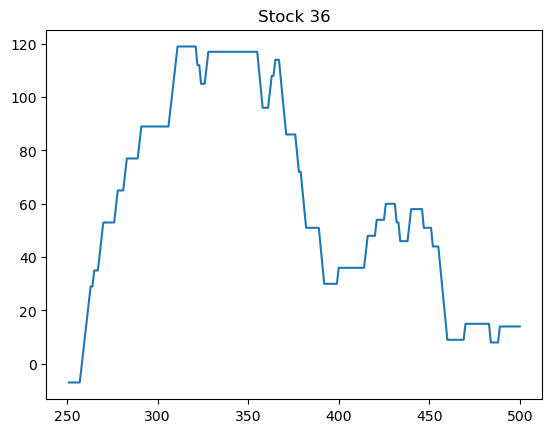

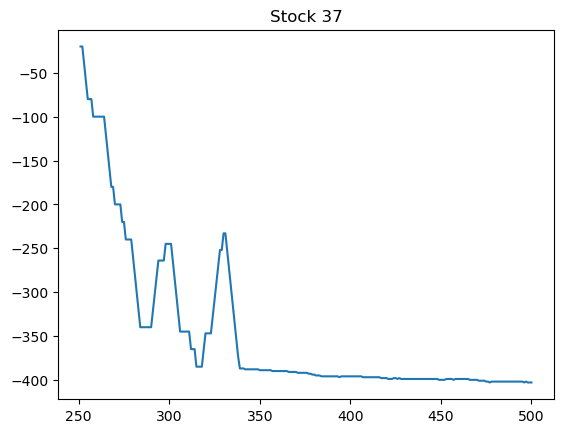

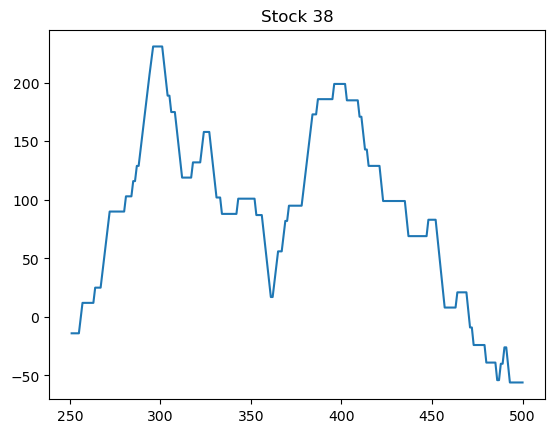

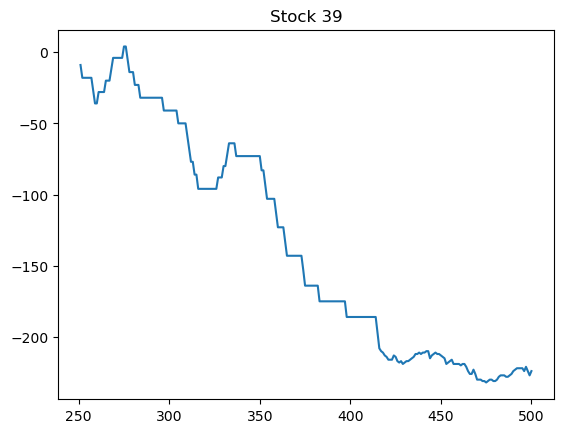

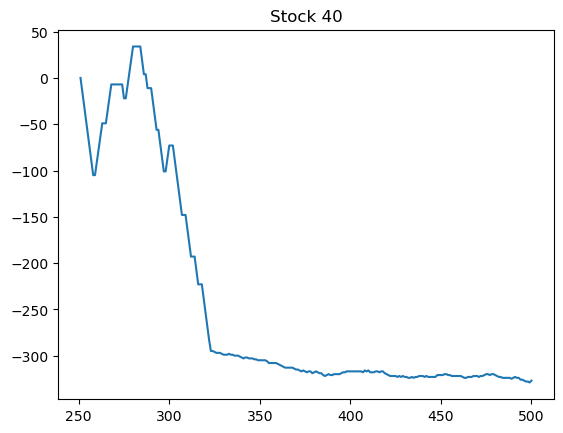

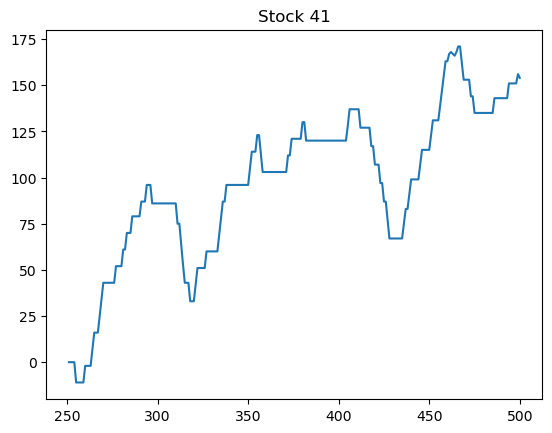

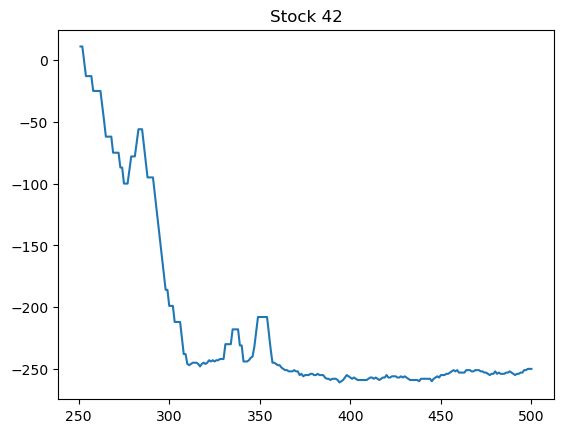

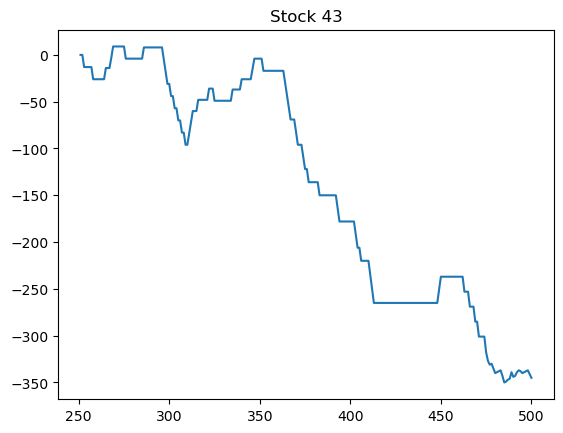

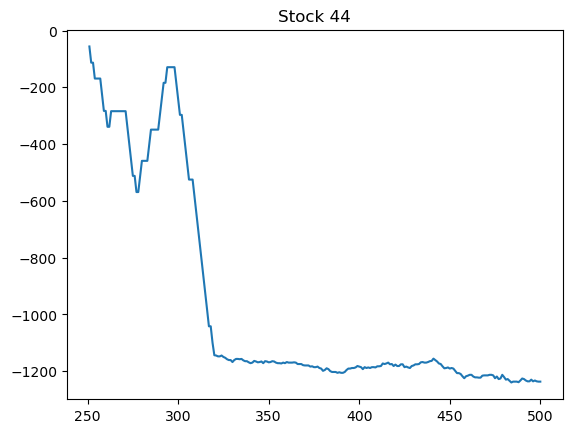

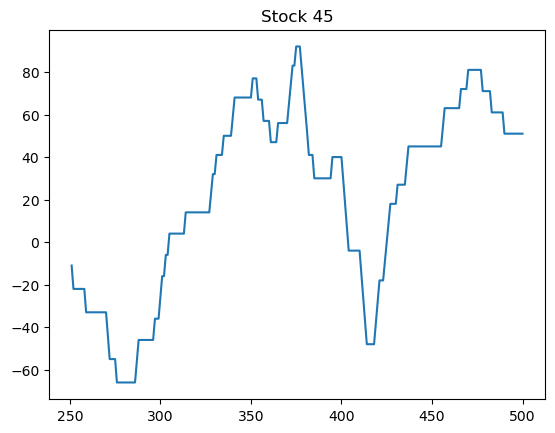

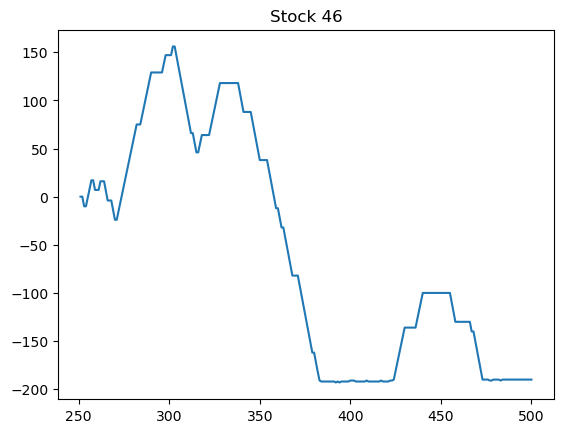

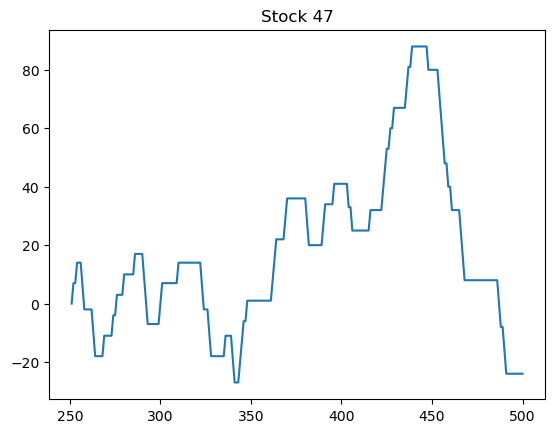

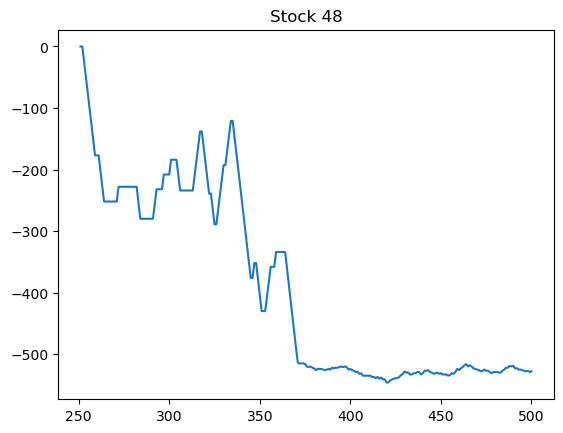

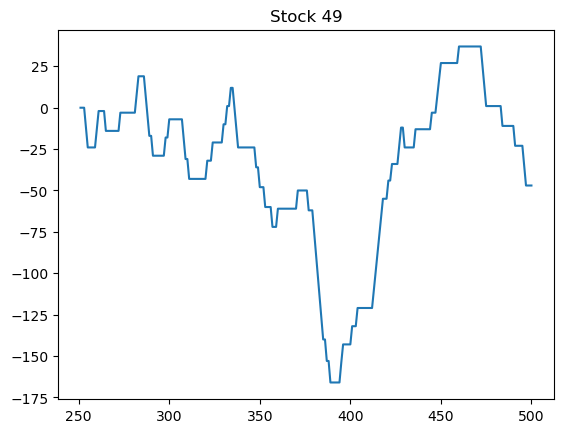

In [3]:
import matplotlib.pyplot as plt
import numpy as np

position = np.array(position)

for i in range(0, 50):
    plt.plot(range(FROM,TO), position[:,i])
    plt.title(f"Stock {i}")
    plt.show()